###***FETAL HEALTH CLASSIFICATION***

Cardiotocography (CTG) is employed during pregnancy for the continuous monitoring of fetal heart rate and uterine contractions, serving to assess fetal well-being and facilitate early identification of potential distress.

The interpretation of CTG plays a crucial role in assessing the risk level of the pregnancy. Detecting abnormalities in the CTG results may prompt additional investigations and potential interventions.

Within this project, our objective is to develop a model for classifying the outcomes of Cardiotocogram tests, aiming to ensure and enhance the well-being of the fetus.

### DATA DICTIONARY



1. **Baseline Value (baseline_fetal_heart_rate):**
   - Definition: The baseline Fetal Heart Rate (FHR) measures the average heart rate of the fetus over a specific duration, usually expressed in beats per minute (bpm).

2. **Accelerations (accelerations):**
   - Definition: The number of accelerations per minute indicates the occurrences of rapid increases in the fetal heart rate.

3. **Fetal Movement (fetal_movement):**
   - Definition: The number of fetal movements per second represents the instances of movement by the fetus.

4. **Uterine Contractions (uterine_contractions):**
   - Definition: The number of uterine contractions per second reflects the frequency of contractions in the uterus.

5. **Light Decelerations (light_decelerations):**
   - Definition: The number of light decelerations (LDs) per second signifies the occurrences of mild decreases in the fetal heart rate.

6. **Severe Decelerations (severe_decelerations):**
   - Definition: The number of severe decelerations (SDs) per second indicates the instances of significant and abrupt decreases in the fetal heart rate.

7. **Prolonged Decelerations (prolongued_decelerations):**
   - Definition: The number of prolonged decelerations (PDs) per second represents extended periods of decreased fetal heart rate.

8. **Abnormal Short-Term Variability (abnormal_short_term_variability):**
   - Definition: The percentage of time with abnormal short-term variability measures the deviation from the expected short-term variability in the fetal heart rate.

9. **Mean Value of Short-Term Variability (mean_value_of_short_term_variability):**
   - Definition: The mean value of short-term variability represents the average variability in the fetal heart rate over a specific duration.

10. **Percentage of Time with Abnormal Long-Term Variability (percentage_of_time_with_abnormal_long_term_variability):**
    - Definition: This percentage indicates the deviation from the expected long-term variability in the fetal heart rate.

11. **Mean Value of Long-Term Variability (mean_value_of_long_term_variability):**
    - Definition: The mean value of long-term variability represents the average variability in the fetal heart rate over a more extended period.

12. **Histogram Width (histogram_width):**
    - Definition: The width of the histogram made using all values from a CTG record.

13. **Histogram Minimum (histogram_min):**
    - Definition: The minimum value in the histogram created using CTG data.

14. **Histogram Maximum (histogram_max):**
    - Definition: The maximum value in the histogram created using CTG data.

15. **Histogram Number of Peaks (histogram_number_of_peaks):**
    - Definition: The number of peaks in the histogram indicates the count of high points in the distribution of CTG data.

16. **Histogram Number of Zeroes (histogram_number_of_zeroes):**
    - Definition: The number of zeros in the histogram represents the count of occurrences where CTG values are zero.

17. **Histogram Mode (histogram_mode):**
    - Definition: The mode of the histogram is the value that appears most frequently.

18. **Histogram Mean (histogram_mean):**
    - Definition: The mean of the histogram represents the average value of CTG data.

19. **Histogram Median (histogram_median):**
    - Definition: The median of the histogram is the middle value when the data is sorted.

20. **Histogram Variance (histogram_variance):**
    - Definition: The variance of the histogram measures the spread or dispersion of CTG data.

21. **Histogram Tendency (histogram_tendency):**
    - Definition: The tendency of the histogram indicates the direction of the distribution, whether it is increasing, decreasing, or constant.


### DATA RETRIEVAL

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
from mlxtend.plotting import plot_decision_regions
# from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
# from sklearn.metrics import plot_confusion_matrix

np.random.seed(0)

In [3]:
from google.colab import files
file = files.upload()
df = pd.read_csv(r'fetal_health.csv')
df.head()

Saving fetal_health.csv to fetal_health.csv


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### DATA DESCRIPTION

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [6]:
df = df.rename(columns = {'baseline value':'baseline_value', 'prolongued_decelerations': 'prolonged_decelerations'})

### DATA EXPLORATION AND VISUALIZATION

<ipython-input-7-a4ad94a03ca6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x="fetal_health",palette=colours)


<Axes: xlabel='fetal_health', ylabel='count'>

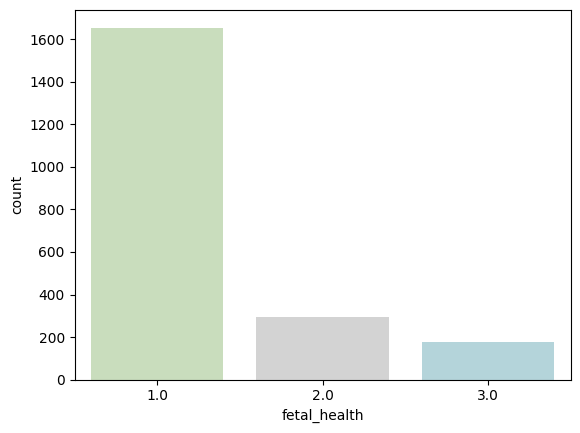

In [7]:

colours=["#AED9E0","#C7E2B8","#D3D3D3"]
sns.countplot(data= df, x="fetal_health",palette=colours)

The count plot of targets reveals an imbalance in the data, a situation that
can potentially lead to inaccurate classification

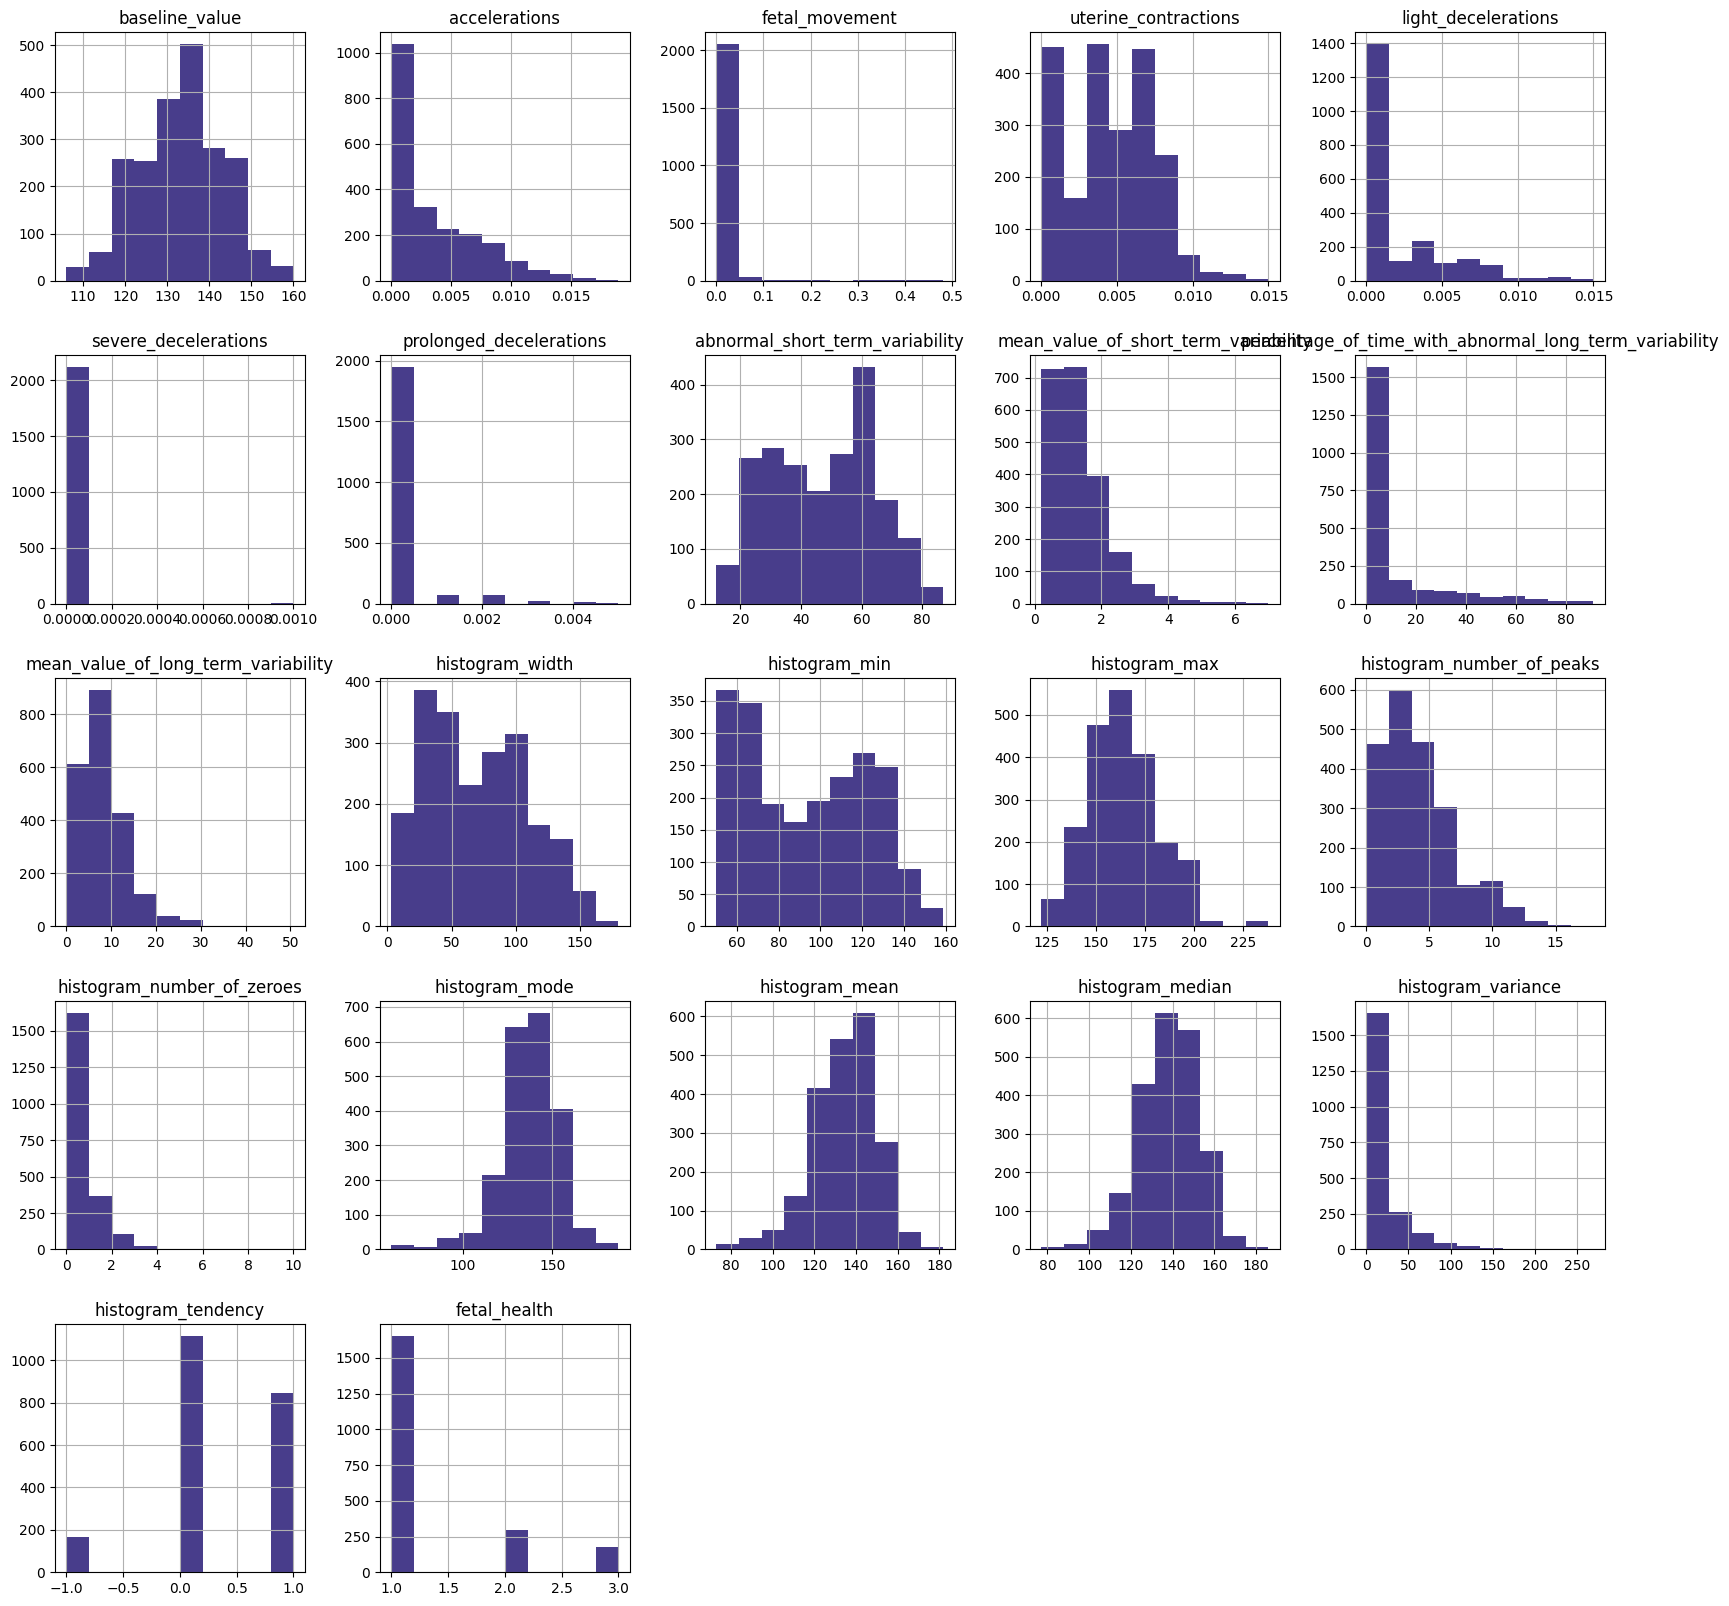

In [8]:
# Evaluating distributions of the features
hist_plot = df.hist(figsize = (20,20), color = "#483D8B")

All the attributes more or less are midly skewed and are normally distributed except the features "light_decelerations", "precentage_of_time_with_abnormal_long_term_variability" etc.

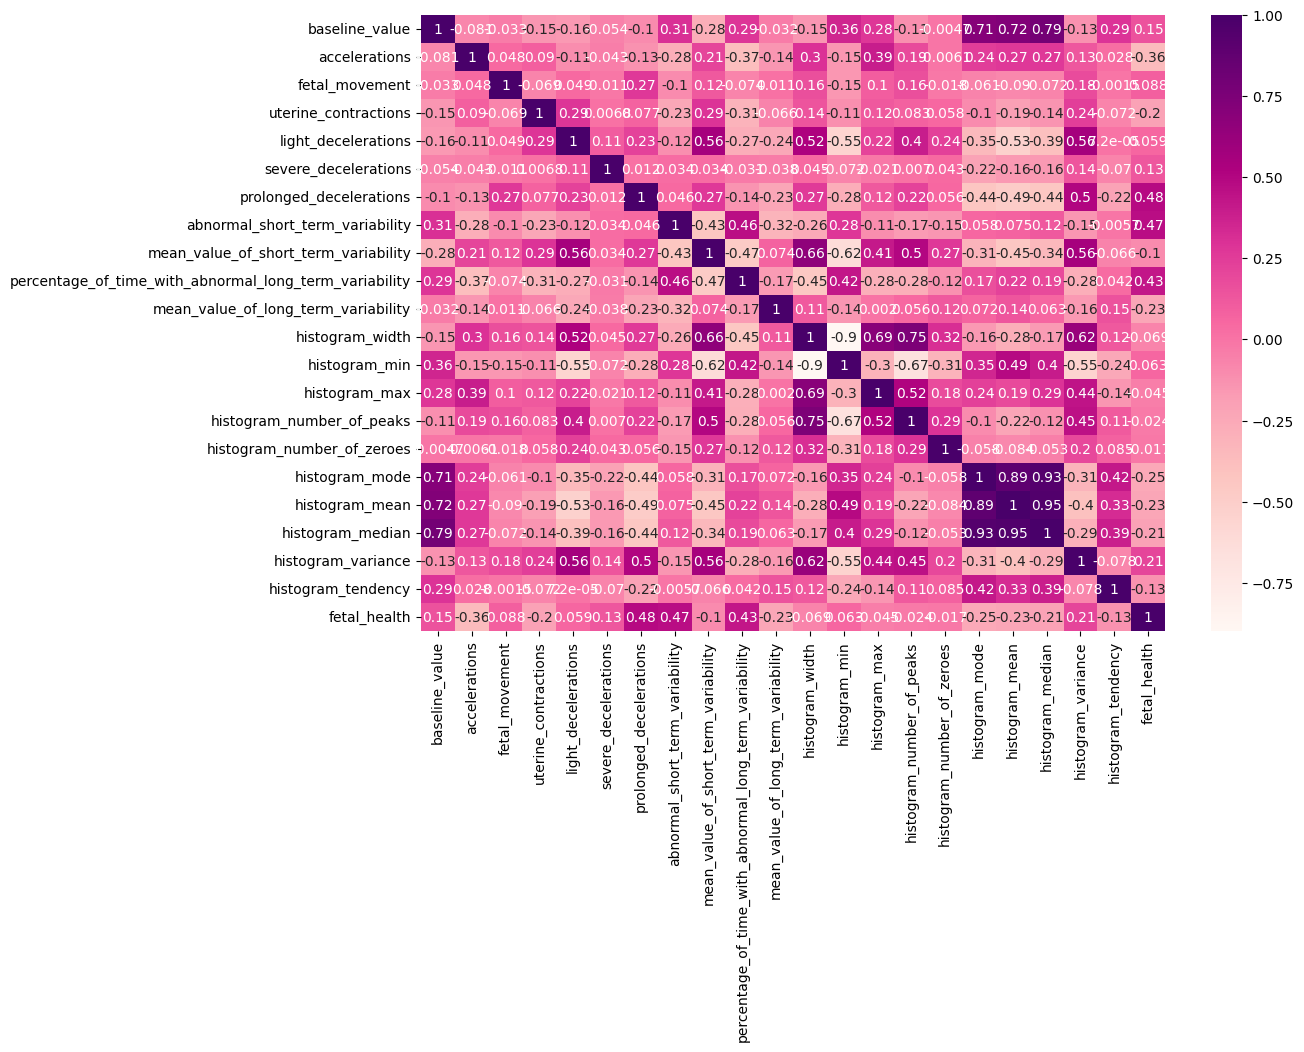

In [9]:
# generate heatmap to display correlations in data
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="RdPu_r");

Examining the correlation matrix reveals that "accelerations," "prolongued_decelerations," "abnormal_short_term_variability," "percentage_of_time_with_abnormal_long_term_variability," and "mean_value_of_long_term_variability" are highly correlated with fetal_health. To gain deeper insights into these features concerning fetal_movement on the y-axis, we aim to obtain a more detailed understanding of trends indicative of fetal health.

Text(0.5, 1.0, 'Prolonged Decelerations and Fetal Health Outcomes')

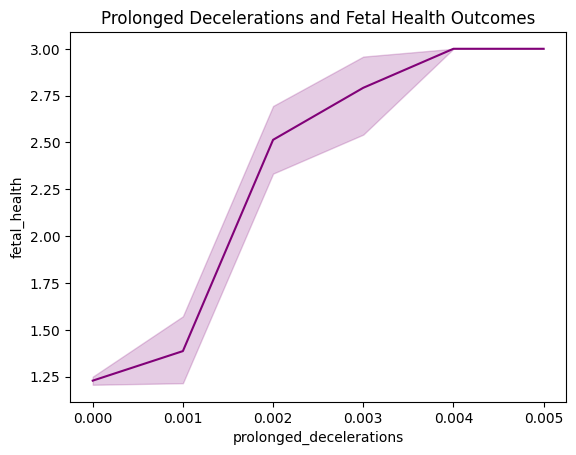

In [10]:
sns.set_palette(palette='RdPu_r')
sns.lineplot(data=df, alpha=1.0,y='fetal_health',x='prolonged_decelerations')
plt.title('Prolonged Decelerations and Fetal Health Outcomes')

This lineplot clearly shows the relationship between prolonged decelerations of fetal heart rate and fetal health outcome. The longer amount of time observed with prolonged decelerations, the more at-risk the health outcome was likely to be

<ipython-input-11-6ca16d3133a1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['baseline_value'])


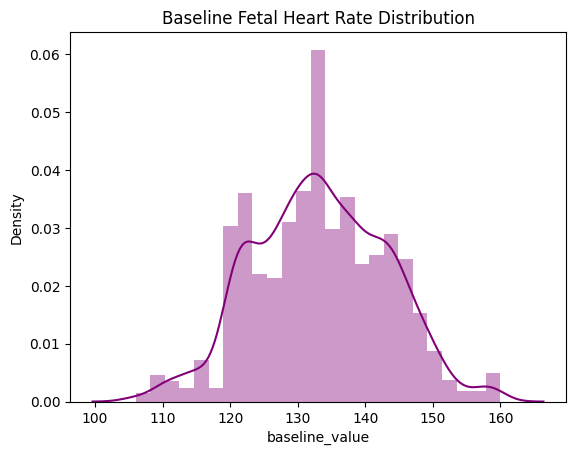

In [11]:
sns.set_palette(palette='RdPu_r')
sns.distplot(df['baseline_value'])
plt.title('Baseline Fetal Heart Rate Distribution');

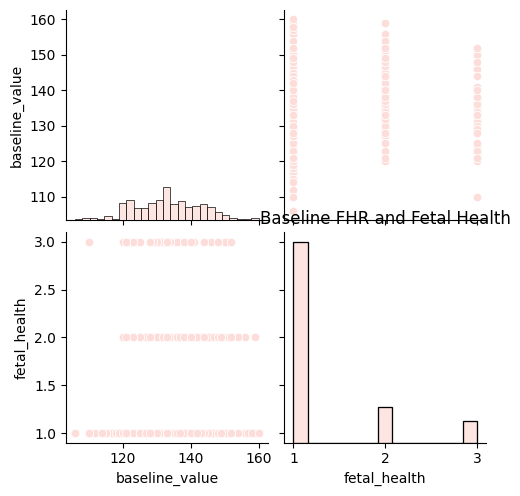

In [12]:
sns.set_palette(palette='RdPu_r')
sns.pairplot(df[['fetal_health','baseline_value']])
plt.title('Baseline FHR and Fetal Health');

There was no obvious relationship between baseline fetal heart rate and fetal health outcome.



In [13]:
hist_cols = ['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

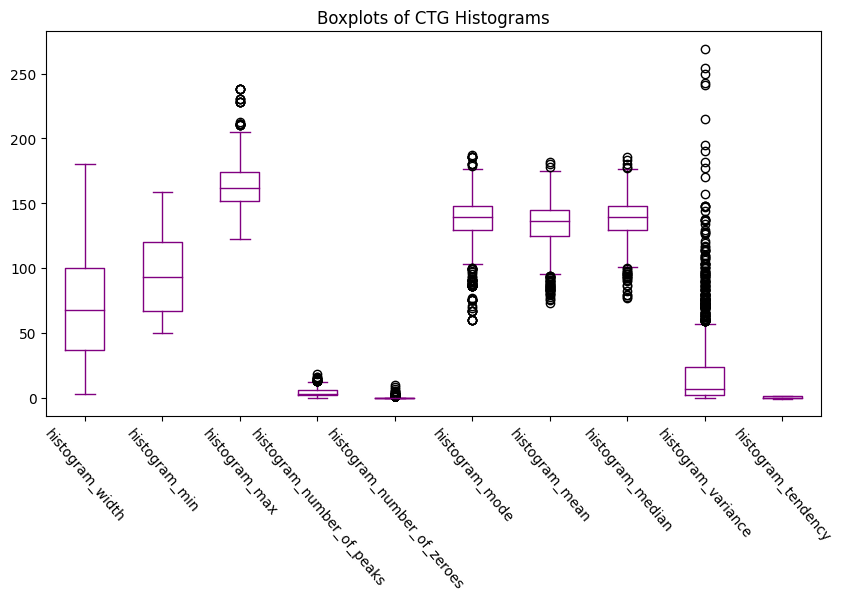

In [14]:
df[hist_cols].plot(kind='box', color='Purple', figsize=(11,6), grid=False);
plt.xticks(rotation=(-48))
plt.title('Boxplots of CTG Histograms');

Many features in the dataset are related to the histogram generated during Cardiotocography (CTG). However, the interpretation of these histogram measurements appears to lack clarity and intuition. Before deciding to remove these columns, we sought to understand how these measurements might influence the prediction of fetal health outcomes.

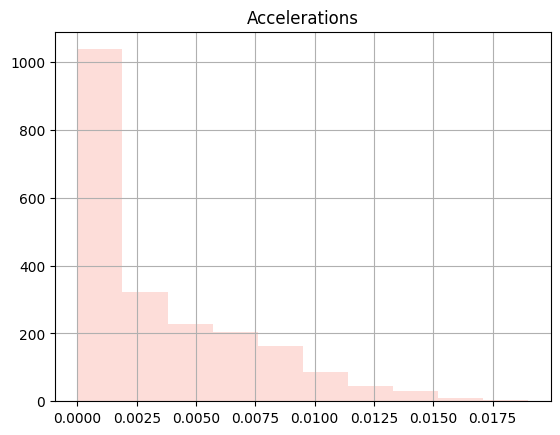

In [15]:
#  plotting acceleration frequencies
sns.set_palette(palette='RdPu')
df.accelerations.hist()
plt.title('Accelerations');

Most of fetal heart rate accelerations were 0.00.



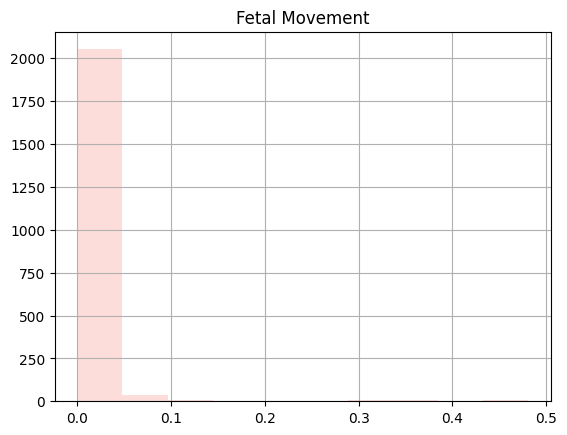

In [16]:
# plotting fetal movement frequencies
df.fetal_movement.hist()
plt.title('Fetal Movement');

The fetal movement value with the maximum frequency is 0



Text(0.5, 1.0, 'Abnormal Short-Term Variability')

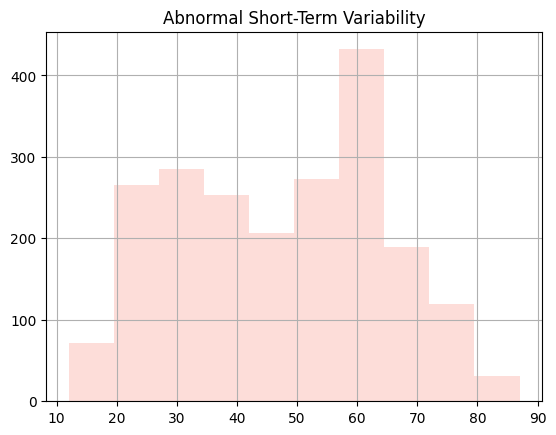

In [17]:
df.abnormal_short_term_variability.hist()
plt.title('Abnormal Short-Term Variability')

This metric represents the proportion of time during which abnormal short-term variability in fetal heart rate was observed. It is considered normal to have some variability around the baseline. However, this column indicates the percentage of time abnormal variability was noted. We can see several records with elevated percentages of abnormal short-term variability.

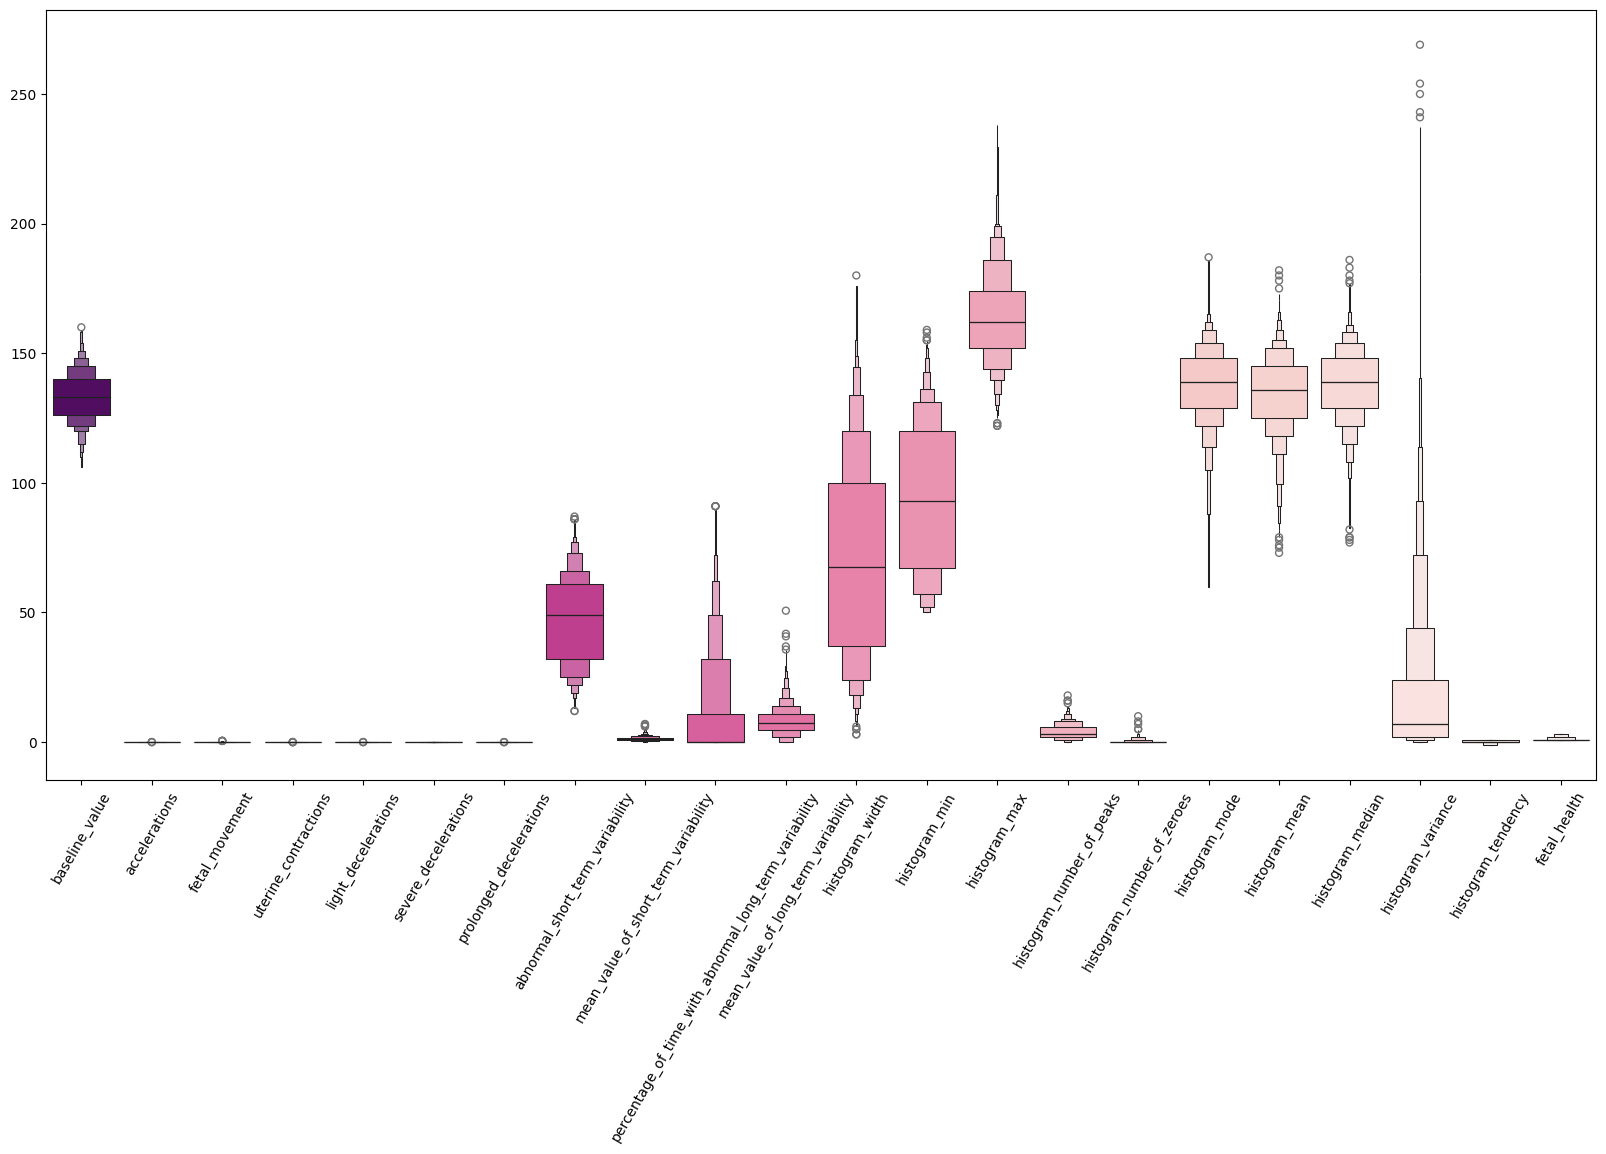

In [18]:
#Plotting the scaled features
plt.figure(figsize=(20,15))
sns.boxenplot(data = df,palette = 'RdPu_r')
plt.xticks(rotation=50)
plt.show()

The above plot shows the range of our feature attributes. All the features are in different ranges. To fit this in a model we must scale it to the same range.

### FEATURE ENGINEERING AND DATA PREPARATIONS


In [19]:
# Feature engineering the target column for Normal and At Risk fetal health
df.loc[df['fetal_health']==1.000, 'fh_outcome'] = 'Normal'
df.loc[df['fetal_health']==3.000, 'fh_outcome'] = 'At Risk'
df.loc[df['fetal_health']==2.000, 'fh_outcome'] = 'At Risk'

In [20]:
df.drop(columns='fetal_health', axis=1, inplace = True)

In [21]:
df.head()


,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,At Risk
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,Normal


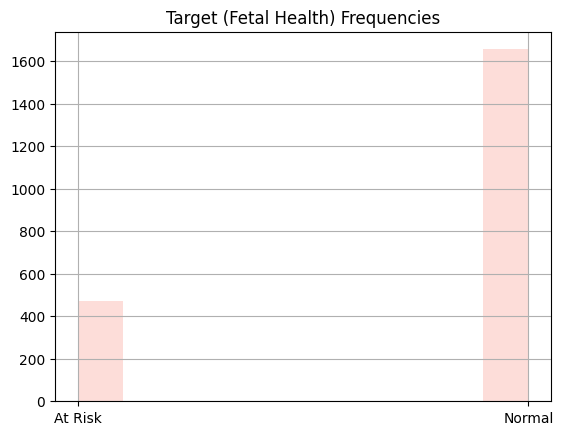

In [23]:
# plotting target frequencies
df.fh_outcome.hist()
plt.title('Target Frequencies');

This is still very unbalanced, but it is straightforward as a binary classification problem.


In [25]:
# Encoding
df = pd.get_dummies(df, columns=['fh_outcome'])
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome_At Risk,fh_outcome_Normal
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,True,False
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,False,True
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,False,True
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,False,True
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,False,True


In [26]:
df = df.drop(columns=['fh_outcome_Normal'], axis=1)
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome_At Risk
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,True
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,False
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,False
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,False
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,False


In [27]:
df = df.rename(columns={'fh_outcome_At Risk':'target'})
df.target.value_counts()

target
False    1655
True      471
Name: count, dtype: int64

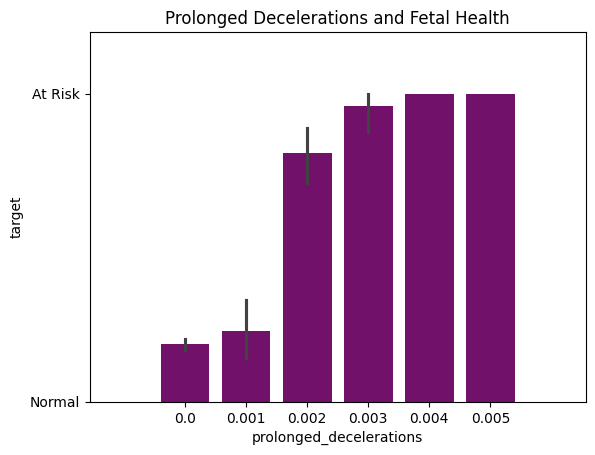

In [28]:
sns.set_palette(palette='RdPu')
sns.barplot(data=df,x='prolonged_decelerations',y='target')

y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.1)

plt.title('Prolonged Decelerations and Fetal Health')
plt.show()

There is a visible relationship between prolonged fetal heart rate decelerations and fetal health.



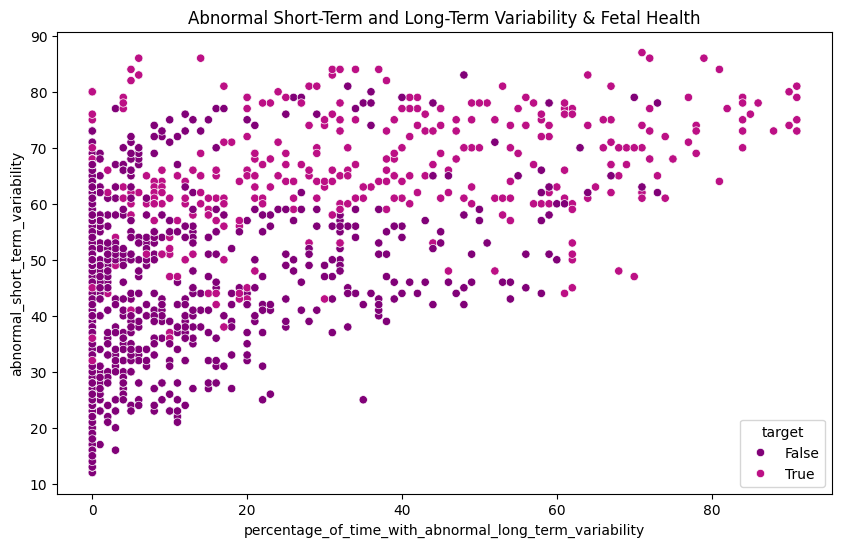

In [29]:
# create scatter plot from each class
sns.set_palette(palette='RdPu_r')
plt.figure(figsize=(10,5))
sns.scatterplot(x="percentage_of_time_with_abnormal_long_term_variability", y="abnormal_short_term_variability", hue='target', data=df)
plt.title('Abnormal Short-Term and Long-Term Variability & Fetal Health');

From this scatter plot, it can be seen that the points with higher values for percentage of time with short and long term variability are predominantly of the At Risk class, with only a few Normal cases

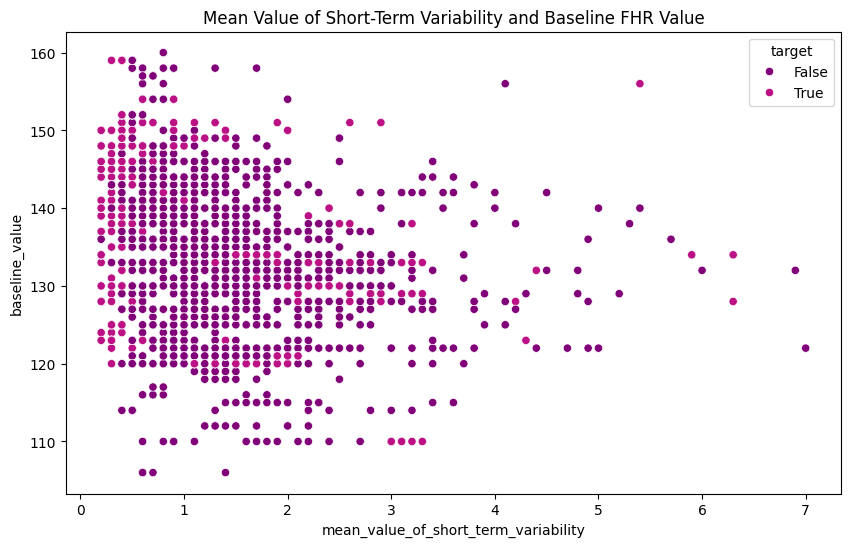

In [30]:
# create scatter plot for samples from each class
sns.set_palette(palette='RdPu_r')

plt.figure(figsize=(10,5))

sns.scatterplot(x="mean_value_of_short_term_variability", y="baseline_value", hue='target', data=df)
plt.title('Mean Value of Short-Term Variability and Baseline FHR Value');

When comparing baseline FHR value and mean value of short term variability, it is not as easy to distinguish a clear relationship between the classes.

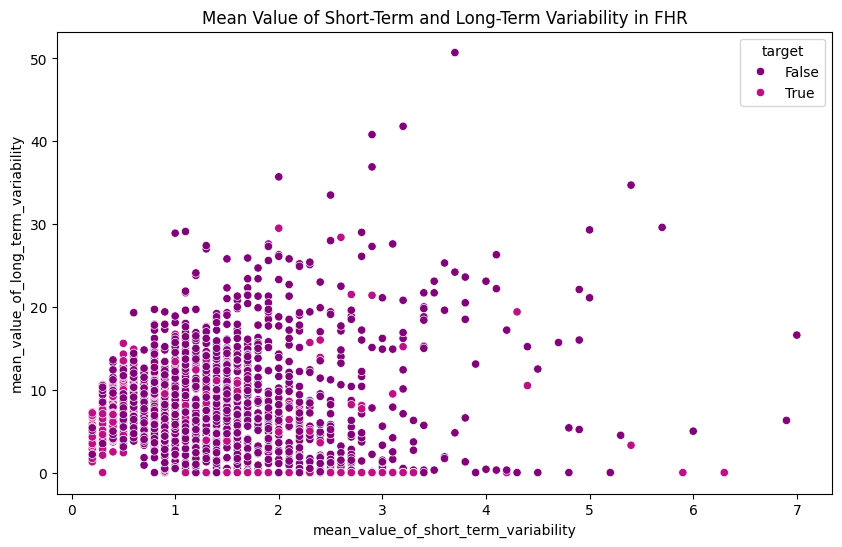

In [31]:
# create scatter plot for samples from each class
sns.set_palette(palette='RdPu_r')

plt.figure(figsize=(10,5))

sns.scatterplot(x="mean_value_of_short_term_variability", y="mean_value_of_long_term_variability", hue='target', data=df)
plt.title('Mean Value of Short-Term and Long-Term Variability in FHR');

It is again difficult to distinguish the pattern here. It is notable that there is no clear way to discern the two classes based on these features alone.

# REDUCING DIMENSIONS & DATA NORMALIZATION

In [32]:
#Assigning values to features as X and target as y
predictors=df.drop(["target","histogram_width","histogram_min","histogram_max","histogram_number_of_peaks","histogram_number_of_zeroes","histogram_mode","histogram_mean","histogram_median","histogram_variance","histogram_tendency"],axis=1)
y=df["target"]

#Set up a standard scaler for the features
col_names = list(predictors.columns)
s_scaler = preprocessing.StandardScaler()
X= s_scaler.fit_transform(predictors)
X = pd.DataFrame(X, columns=col_names)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline_value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolonged_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


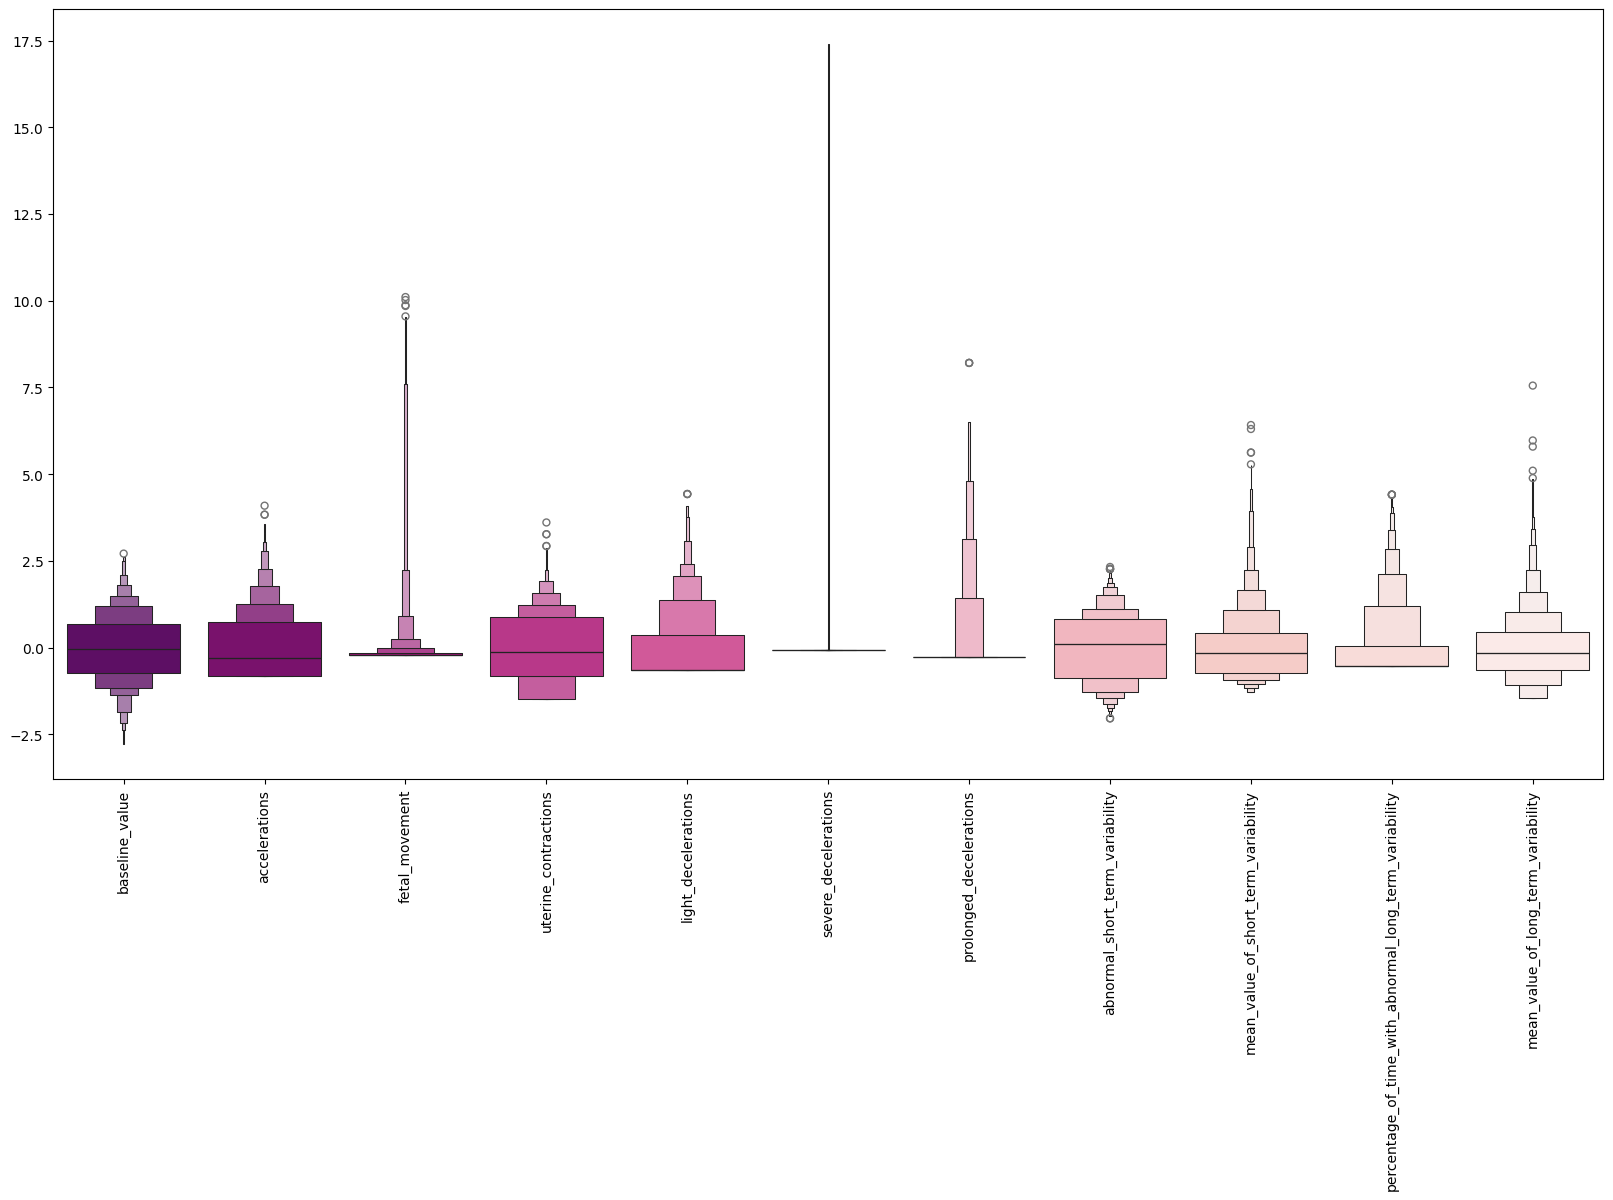

In [33]:
#looking at the scaled features
plt.figure(figsize=(20,11))
sns.boxenplot(data = X,palette = 'RdPu_r')
plt.xticks(rotation=90)
plt.show()

# MODELING
### A) LOGISTIC REGRESSION

In [34]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [35]:
model_lr = LogisticRegression(penalty='l2',max_iter=1000)
result_lr = model_lr.fit(X_train,y_train)

In [36]:
y_pred = model_lr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8981191222570533

In [37]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.93      0.93       496
        True       0.76      0.79      0.78       142

    accuracy                           0.90       638
   macro avg       0.85      0.86      0.85       638
weighted avg       0.90      0.90      0.90       638



<Axes: >

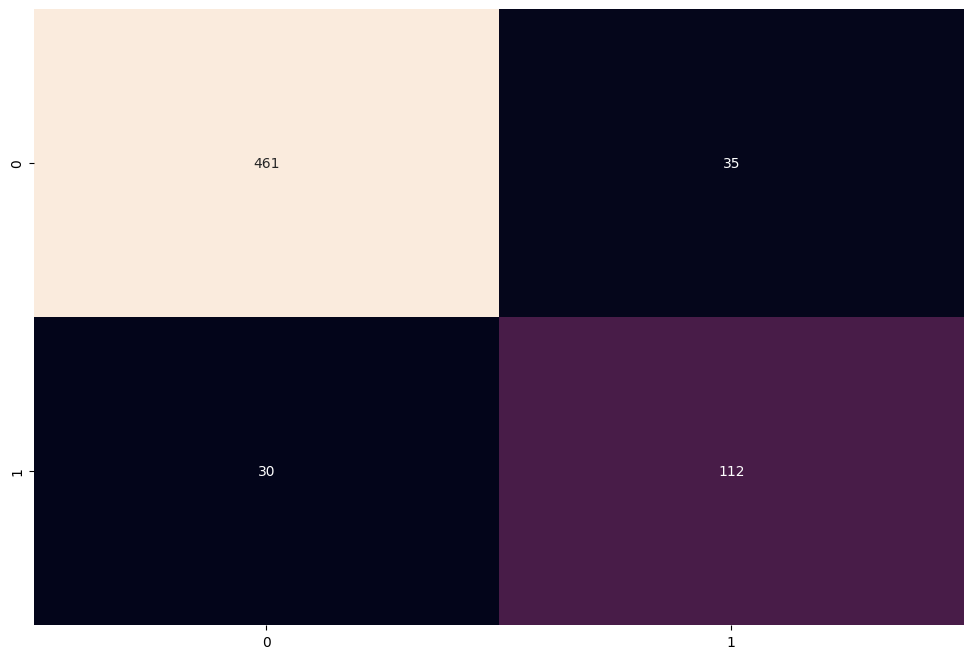

In [38]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g', cbar=False)

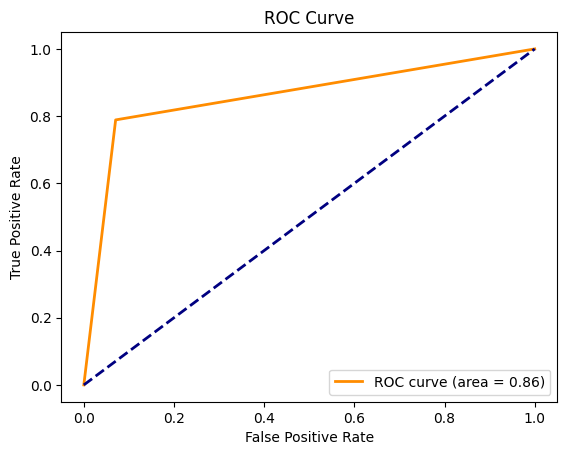

In [39]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### B) DECISION TREES

In [40]:
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9294670846394985
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.97      0.96       496
        True       0.87      0.80      0.84       142

    accuracy                           0.93       638
   macro avg       0.91      0.88      0.90       638
weighted avg       0.93      0.93      0.93       638



<Axes: >

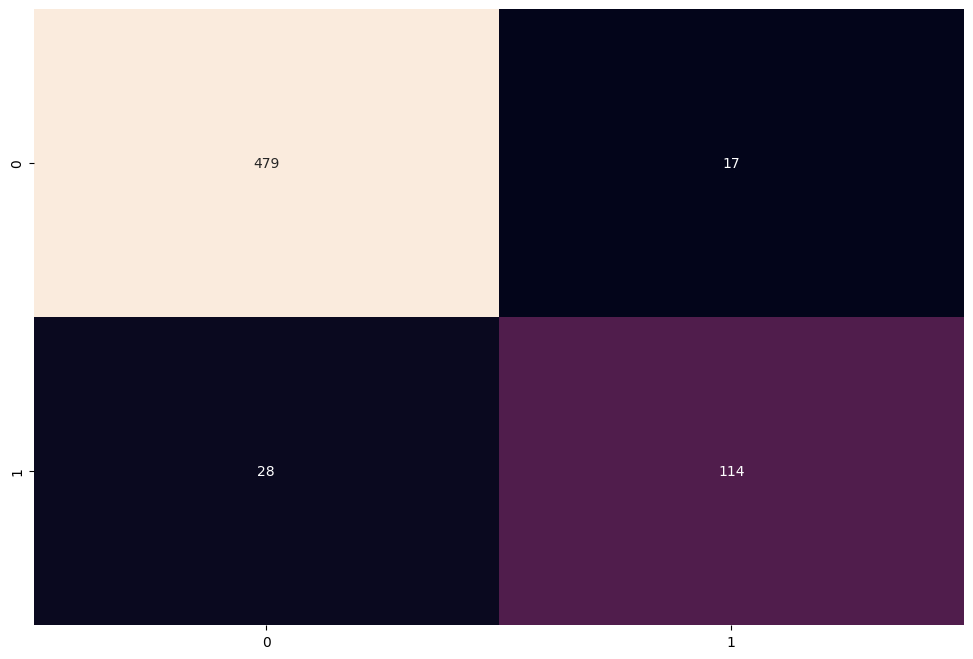

In [41]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g', cbar=False)

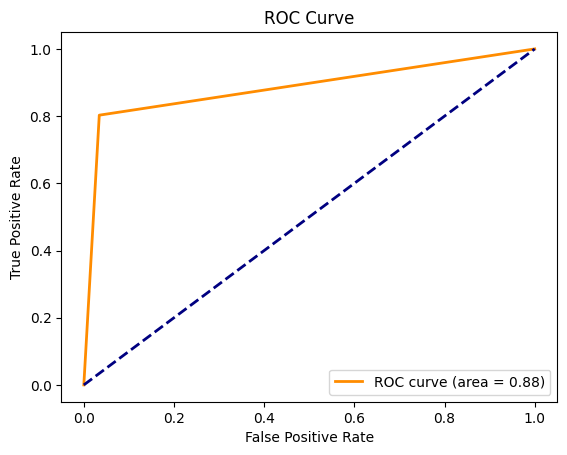

In [42]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### C) KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9153605015673981
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.95      0.95       496
        True       0.82      0.79      0.81       142

    accuracy                           0.92       638
   macro avg       0.88      0.87      0.88       638
weighted avg       0.91      0.92      0.91       638



<Axes: >

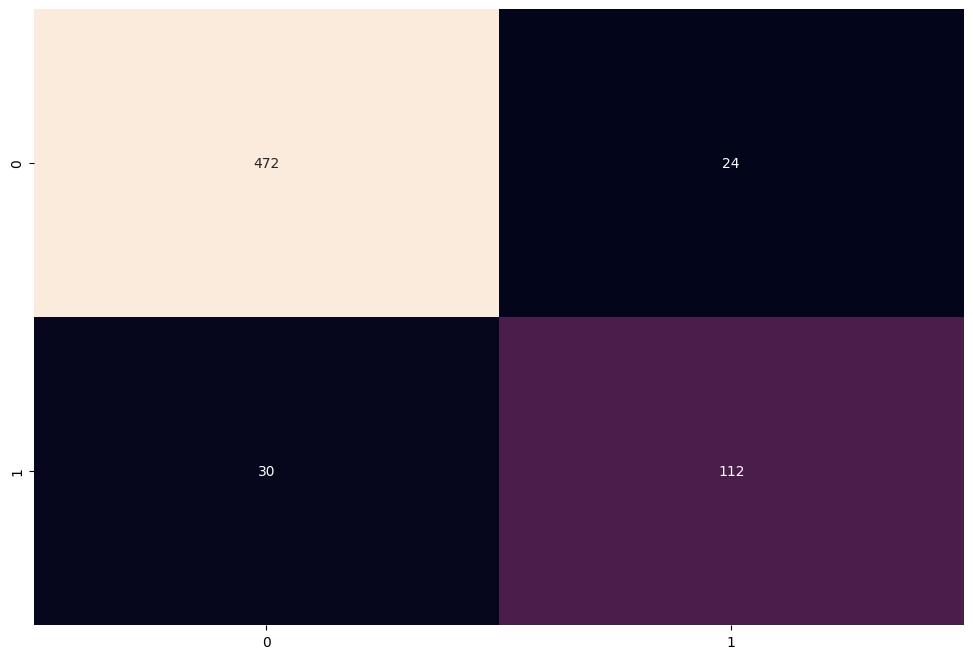

In [44]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g', cbar=False)

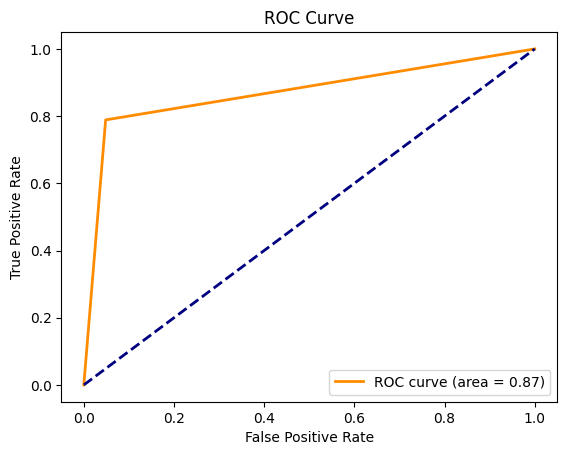

In [45]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### D) RANDOM FOREST

In [46]:
# Create a Random Forest classifier with 100 trees
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9498432601880877
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.98      0.97       496
        True       0.93      0.84      0.88       142

    accuracy                           0.95       638
   macro avg       0.94      0.91      0.92       638
weighted avg       0.95      0.95      0.95       638



<Axes: >

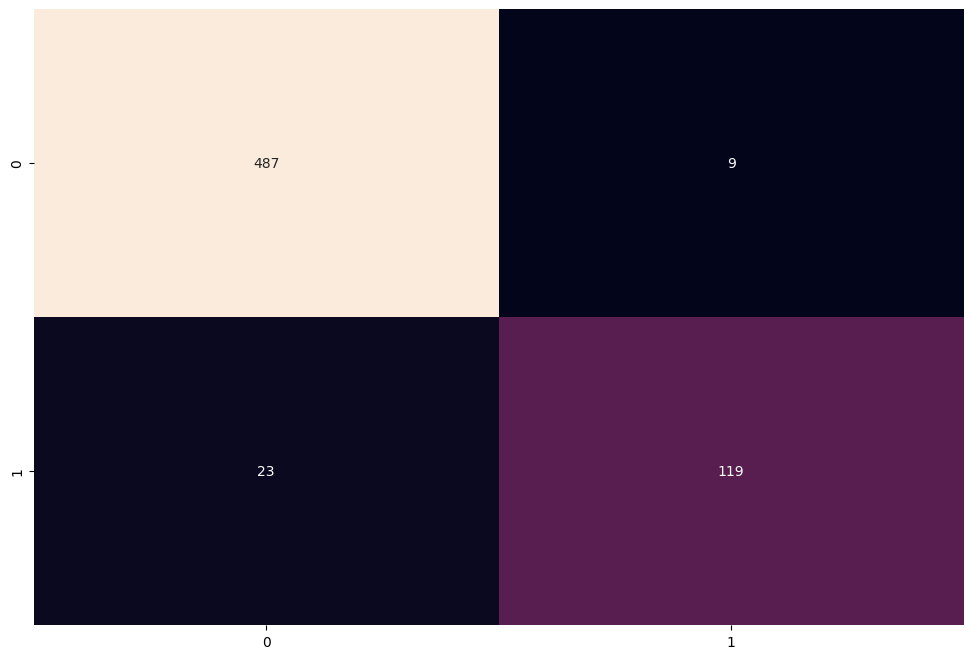

In [47]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g', cbar=False)

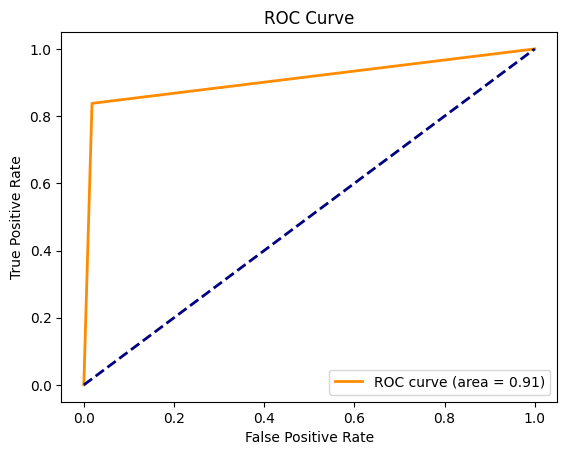

In [48]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### E) SVM

In [49]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9184952978056427
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.96      0.95       496
        True       0.84      0.78      0.81       142

    accuracy                           0.92       638
   macro avg       0.89      0.87      0.88       638
weighted avg       0.92      0.92      0.92       638



<Axes: >

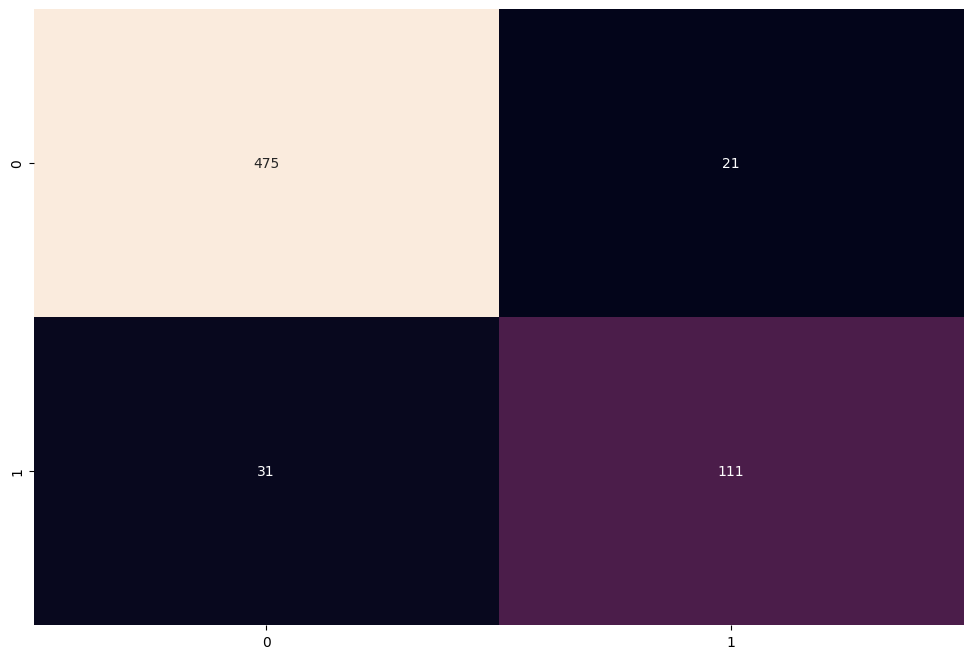

In [50]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g', cbar=False)

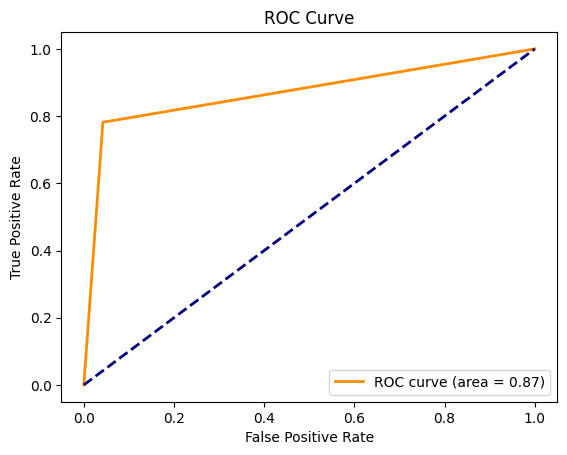

In [51]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# SUMMARIZE THE MODELS

In [52]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_recall_fscore_support

# Create a dictionary to store model results
model_results = {}

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_logreg, average='weighted')
model_results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_logreg),
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'AUC': roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])
}

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')
model_results['K-Nearest Neighbors'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'AUC': roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
}

# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
model_results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'AUC': roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])
}

# Support Vector Machine
svm_model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
y_pred_svm = svm_model.predict(X_test)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='weighted')
model_results['Support Vector Machine'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'AUC': roc_auc_score(y_test, y_prob_svm)
}

# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='weighted')
model_results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'AUC': roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])
}

# Convert the results to a DataFrame for easy viewing
results_df = pd.DataFrame.from_dict(model_results, orient='index')


# Display the summary table
results_df

,Accuracy,Precision,Recall,F1 Score,AUC
Logistic Regression,0.898119,0.899506,0.898119,0.898742,0.949341
K-Nearest Neighbors,0.915361,0.914263,0.915361,0.914702,0.936123
Random Forest,0.949843,0.949290,0.949843,0.948892,0.977169
Support Vector Machine,0.891850,0.895326,0.891850,0.893260,0.949256
Decision Tree,0.929467,0.928182,0.929467,0.928433,0.884271


#INSIGHTS FOR DECISION MAKING

The most impactful features were accelerations, percentage of time with abnormal short term variability, percentage of time with abnormal long term variability, prolonged decelerations, and mean value of short term variability.

Since we have shown that automated CTG data provides an ability to predict if a fetus in-utero is in distress with a recall rate of 95%, my main recommendation is that CTGs be performed as often as possible on expectant mothers. This is an easy and highly interpretable way to maintain the necessary level of care to preserve maternal and fetal health.

We recommend that one must treat all at-risk indicators with urgency and a better-safe-than-sorry approach. By having a lower threshold for a higher level of care, and accepting the slight cost increase that may go along with that, one will benefit in the long run by having a greater track record of saving babies and mothers, and be able to improve one’s practice’s fetal mortality stats